In [1]:
import pandas as pd
#import os
#os.getcwd()

In [2]:
ri = pd.read_csv('/Users/ecuerbo/python/pyprac/data/ri.csv')
ri.head()

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (6,17,30) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
0,1,2005-11-22,11:15:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
1,2,2005-10-01,12:20:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
2,3,2005-10-01,12:30:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN
3,4,2005-10-01,12:50:00,X3,white,male,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,M,M,NaN,NaN,NaN
4,5,2005-10-01,13:10:00,X3,white,female,200,vehicular,False,True,...,Speeding,NaN,NaN,SP,W,F,M,NaN,NaN,NaN


In [3]:
ri.isnull().sum()

raw_row_number                0
date                         10
time                         10
zone                         10
subject_race              29073
subject_sex               29097
department_id                10
type                          0
arrest_made               29073
citation_issued           29073
warning_issued            29073
outcome                   35841
contraband_found         491919
contraband_drugs         493693
contraband_weapons       497886
contraband_alcohol       508464
contraband_other         491919
frisk_performed              10
search_conducted              0
search_basis             491919
reason_for_search        491919
reason_for_stop           29073
vehicle_make             191564
vehicle_model            279593
raw_BasisForStop          29073
raw_OperatorRace          29073
raw_OperatorSex           29073
raw_ResultOfStop          29073
raw_SearchResultOne      491919
raw_SearchResultTwo      508862
raw_SearchResultThree    509513
dtype: i

In [4]:
ri.describe()

,raw_row_number
count,509681.000000
mean,254841.000000
std,147132.375613
min,1.000000
25%,127421.000000
50%,254841.000000
75%,382261.000000
max,509681.000000


In [31]:
ri['type'].unique()
ri['raw_SearchResultTwo'].unique()

array([nan, 'W', 'D', 'A', 'O', 'M'], dtype=object)

In [6]:
#drop
contraband = ri.dropna(subset=["contraband_found"])

In [7]:
contraband.isnull().sum()

raw_row_number               0
date                         0
time                         0
zone                         0
subject_race                 0
subject_sex                  0
department_id                0
type                         0
arrest_made                  0
citation_issued              0
warning_issued               0
outcome                    431
contraband_found             0
contraband_drugs          1774
contraband_weapons        5967
contraband_alcohol       16545
contraband_other             0
frisk_performed              0
search_conducted             0
search_basis                 0
reason_for_search            0
reason_for_stop              0
vehicle_make              5020
vehicle_model             8571
raw_BasisForStop             0
raw_OperatorRace             0
raw_OperatorSex              0
raw_ResultOfStop             0
raw_SearchResultOne          0
raw_SearchResultTwo      16943
raw_SearchResultThree    17594
dtype: int64

In [8]:
contraband['contraband_found'].count()

17762

In [9]:
contraband.head()

,raw_row_number,date,time,zone,subject_race,subject_sex,department_id,type,arrest_made,citation_issued,...,reason_for_stop,vehicle_make,vehicle_model,raw_BasisForStop,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,raw_SearchResultTwo,raw_SearchResultThree
297,298,2005-12-06,16:29:00,K2,black,male,900,vehicular,False,True,...,Registration Violation,AUDI,100S,RV,B,M,M,N,NaN,NaN
304,305,2005-12-01,20:00:00,K3,black,male,300,vehicular,False,True,...,Other Traffic Violation,NaN,NaN,OT,B,M,M,N,NaN,NaN
305,306,2005-12-01,20:25:00,K3,black,male,300,vehicular,False,True,...,Registration Violation,NaN,NaN,RV,B,M,M,N,NaN,NaN
306,307,2005-12-01,21:05:00,K3,black,female,300,vehicular,False,True,...,Registration Violation,NaN,NaN,RV,B,F,M,N,NaN,NaN
316,317,2005-12-07,02:38:00,K3,white,male,300,vehicular,True,False,...,Speeding,NaN,NaN,SP,W,M,P,N,NaN,NaN


In [10]:
contraband['contraband_found'].unique()

array([False, True], dtype=object)

In [11]:
contraband.date.dtype

dtype('O')

In [12]:
combined = contraband.date.str.cat(contraband.time, sep=' ')

In [13]:
combined.head()

297    2005-12-06 16:29:00
304    2005-12-01 20:00:00
305    2005-12-01 20:25:00
306    2005-12-01 21:05:00
316    2005-12-07 02:38:00
Name: date, dtype: object

In [14]:
contraband['dt'] = pd.to_datetime(combined)

/var/folders/g6/qw3t2lbx7x91r1mfyp6k77k00000gn/T/ipykernel_9018/3833834112.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contraband['dt'] = pd.to_datetime(combined)


In [15]:
contraband.set_index('dt', inplace=True)

In [16]:
contraband.dtypes

raw_row_number            int64
date                     object
time                     object
zone                     object
subject_race             object
subject_sex              object
department_id            object
type                     object
arrest_made              object
citation_issued          object
warning_issued           object
outcome                  object
contraband_found         object
contraband_drugs         object
contraband_weapons       object
contraband_alcohol       object
contraband_other         object
frisk_performed          object
search_conducted           bool
search_basis             object
reason_for_search        object
reason_for_stop          object
vehicle_make             object
vehicle_model            object
raw_BasisForStop         object
raw_OperatorRace         object
raw_OperatorSex          object
raw_ResultOfStop         object
raw_SearchResultOne      object
raw_SearchResultTwo      object
raw_SearchResultThree    object
dtype: o

In [17]:
ri = contraband.drop([
'raw_row_number','date','time','type', 'vehicle_make',
       'vehicle_model',"search_conducted", 'raw_SearchResultTwo',
       'raw_SearchResultThree'], axis = 1)

In [18]:
boo=['arrest_made','citation_issued', 'warning_issued', 'contraband_found','frisk_performed']
ri[boo]=ri[boo].astype('bool')

In [19]:
cat=['zone', 'subject_race', 'subject_sex', 'department_id', 'outcome', 
       'contraband_drugs', 'contraband_weapons', 'contraband_alcohol',
       'contraband_other', 'search_basis', 'reason_for_stop',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne']
ri[cat] = ri[cat].astype('category')

In [20]:
all=['zone', 'subject_race', 'subject_sex', 'department_id', 'outcome', 
       'contraband_drugs', 'contraband_weapons', 'contraband_alcohol',
       'contraband_other', 'search_basis', 'reason_for_stop',
       'raw_BasisForStop', 'raw_OperatorRace', 'raw_OperatorSex',
       'raw_ResultOfStop', 'raw_SearchResultOne','arrest_made','citation_issued', 'warning_issued', 'contraband_found','frisk_performed','reason_for_search']
clean = ri[all]

In [21]:
clean.describe()

,zone,subject_race,subject_sex,department_id,outcome,contraband_drugs,contraband_weapons,contraband_alcohol,contraband_other,search_basis,...,raw_OperatorRace,raw_OperatorSex,raw_ResultOfStop,raw_SearchResultOne,arrest_made,citation_issued,warning_issued,contraband_found,frisk_performed,reason_for_search
count,17762,17762,17762,17762,17331,15988,11795,1217,17762,17762,...,17762,17762,17762,17762,17762,17762,17762,17762,17762,17762
unique,6,5,2,16,3,2,2,2,2,3,...,7,2,6,6,2,2,2,2,2,188
top,X4,white,male,500,citation,False,False,True,False,other,...,W,M,M,N,False,True,False,False,True,Incident to Arrest
freq,6410,9968,15303,5514,10513,11223,11296,1120,16771,9035,...,9968,15303,10513,11183,11575,10513,17131,11183,9322,6998


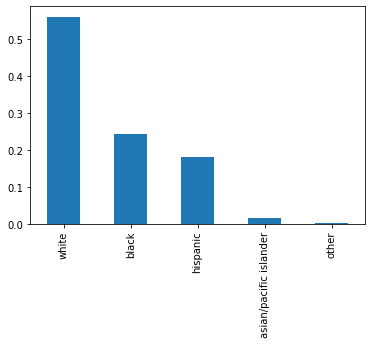

In [23]:
import matplotlib.pyplot as plt
clean['subject_race'].value_counts(normalize=True).plot(kind='bar');plt.show()

In [24]:
ri.shape

(17762, 22)

In [ ]:
# Reset the index of 'ri'
ri.reset_index(inplace=True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE','rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())